In [1]:
import ants
import numpy as np
import os
from matplotlib import pyplot as plt

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [12]:
subs = [f for f in os.listdir('../analyses_SPM/preproc_1/') if f.startswith('sub')]

In [13]:
ims = []
fns = []
for sub in subs:
    for r in [1,2]:
        fn = f'../analyses_SPM/preproc_{r}/{sub}/spmT_0001.nii'
        fns.append(fn)
        ims.append(ants.image_read(fn))

In [14]:
len(ims)

68

In [15]:
im_avg = ims[0].new_image_like(np.array([im.numpy() for im in ims]).mean(axis=0))

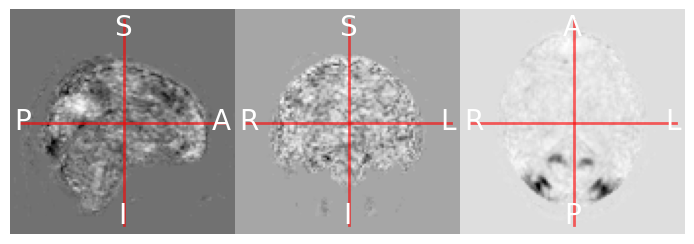

In [16]:
im_avg.plot_ortho(flat=True)

In [21]:
im_avg.to_filename('../Misc/avg.nii')

In [2]:
template = ants.image_read('../Misc/single_subj_T1.nii')

In [17]:
#ffa_map = ants.image_read('../Misc/ffa_map.nii')
ffa_map = ants.image_read('../Misc/v1.nii')

In [18]:
#ants.resample_image_to_target(ffa_map,im_avg).to_filename('../Misc/ffa_map_resampled.nii')
ants.resample_image_to_target(ffa_map,im_avg).to_filename('../Misc/v1_resampled.nii')

In [ ]:
ants.resample_image_to_target(template,im_avg).to_filename('../Misc/template_resampled.nii')

In [19]:
# ffa_map = ants.image_read('../Misc/v1_resampled.nii')
# ffa_mask = ffa_map.copy()
# ffa_mask[ffa_mask<7]=0
# ffa_mask[ffa_mask>=7]=1
# ffa_mask.to_filename('../Misc/v1_mask_resampled.nii')

In [ ]:
ffa_map = ants.image_read('../Misc/v1_resampled.nii')
ffa_mask = ffa_map.copy()
ffa_mask[ffa_mask<5]=0
ffa_mask[ffa_mask>=5]=1
ffa_mask.to_filename('../Misc/ffa_mask_resampled.nii')

In [22]:
ffa_mask = ants.image_read('../Misc/ffa_mask_resampled.nii')

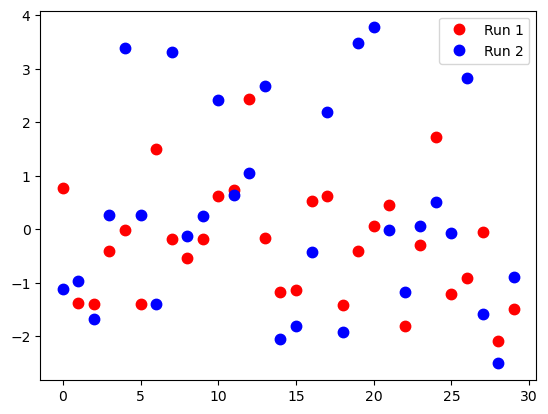

In [38]:
plt.plot(ys[::2],'r.',markersize=15)
plt.plot(ys[1::2],'b.',markersize=15)
plt.legend(['Run 1','Run 2'])

In [36]:
np.corrcoef(ys[1::2],ys[0::2])[0,1]

0.3430438026404636

In [24]:
# ys = [im.numpy()[ffa_mask.numpy()==1].mean() for im in ims]
# plt.plot(ys,'b.',markersize=20)
# plt.plot([0,len(ys)],[0,0])

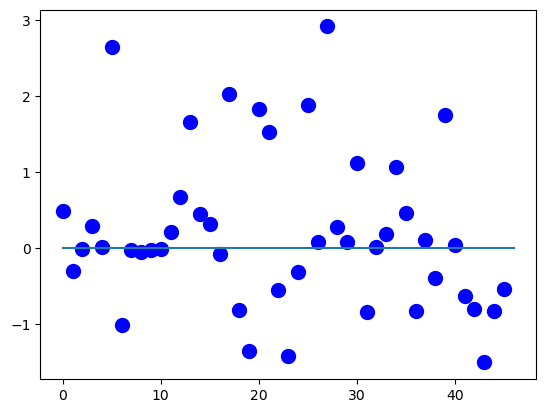

In [47]:
ys = [im.numpy()[ffa_mask.numpy()==1].mean() for im in ims]
plt.plot(ys,'b.',markersize=20)
plt.plot([0,len(ys)],[0,0])

In [7]:

im = ants.image_read('../Data/020-fmriprepped/sub-NDARINVTKENUL3C/ses-baselineYear1Arm1/func/sub-NDARINVTKENUL3C_ses-baselineYear1Arm1_task-nback_run-01_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii')


In [11]:
im

ANTsImage
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (97, 115, 97, 367)
	 Spacing    : (2.0, 2.0, 2.0, 0.8)
	 Origin     : (96.5, 132.5, -78.5, 0.0)
	 Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

In [15]:
#plt.plot(im.numpy()[32,48,32,:])